In [1]:
# first we import the libraries required
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
#here svm is support vector machine
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# now we will do the data collection part and analysis
# This is PIMA diabetes dataset
diabetes_dataset=pd.read_csv('/content/diabetes.csv')
#printing the first 5 rows of the dataset
print(diabetes_dataset.head())
#here 1 represents the patient is diabetes and 0 represents the patient is non diabetic
#number of rown and columns in the dataset
print(diabetes_dataset.shape)
# now lets get some statistical measures of this dataframe
print(diabetes_dataset.describe())
# in our dataset we have all numerical values, if nnotow we can use the below three methods for encoding
#since the data should be numerical only for processing
#Choosing the Right Method:

#Label Encoding: Use when there's a clear order between categories (e.g., 'low', 'medium', 'high').
#One-Hot Encoding: Use when there's no inherent order between categories (e.g., 'red', 'green', 'blue').
#Target Encoding: Use when you have a large number of categories and want to capture the relationship between the categorical feature and the target variable.
#Important Considerations:
#Handling Missing Values: Before encoding, handle missing values using techniques like imputation or removal.
#Feature Scaling: After encoding, consider scaling the numerical features to a common range to improve model performance.
#Feature Importance: Evaluate the importance of encoded features to avoid overfitting and improve model interpretability.
#By effectively converting string data into numerical format, you can prepare your data for machine learning algorithms and achieve better model performance.
# to see the counts of different outcomes in a particular column we do the below command
# here we are seeing how many number of output labels do we have is that how many diabetic and how many now diabetic
print(diabetes_dataset['Outcome'].value_counts())

#printing null values
diabetes_dataset.isnull().sum()
# we have no null values


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [2]:
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',]
for i in variables:
    c = 0
    for x in (diabetes_dataset[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


In [3]:
#replacing the missing values with the mean
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    diabetes_dataset[i].replace(0,diabetes_dataset[i].mean(),inplace=True)

<ipython-input-3-9a87be06bb56>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_dataset[i].replace(0,diabetes_dataset[i].mean(),inplace=True)


In [4]:
#checking to make sure that incorrect values are replace
for i in variables:
    c = 0
    for x in (diabetes_dataset[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


In [5]:
#checking missing values -
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


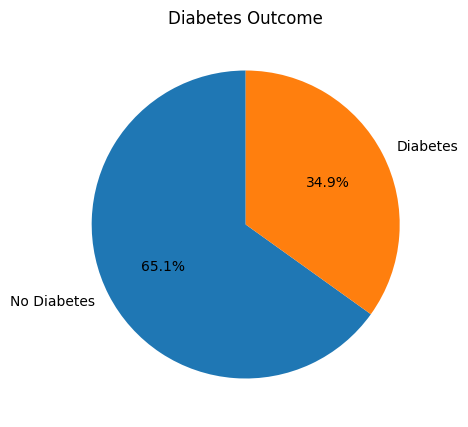

In [6]:
plt.figure(figsize=(5,5))
plt.pie(diabetes_dataset['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Diabetes Outcome')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


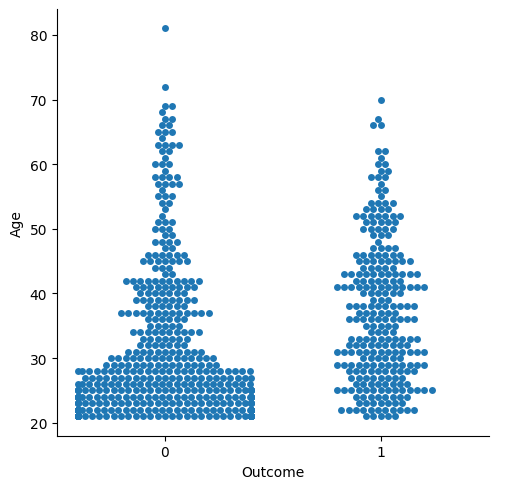

In [7]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data=diabetes_dataset)


         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.705367      70.810008      25.373135  106.457354   
1           4.865672  142.159661      74.950326      28.907494  141.426597   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.880066                  0.429734  31.190000  
1        35.381288                  0.550500  37.067164  
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.62x0.77)
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              

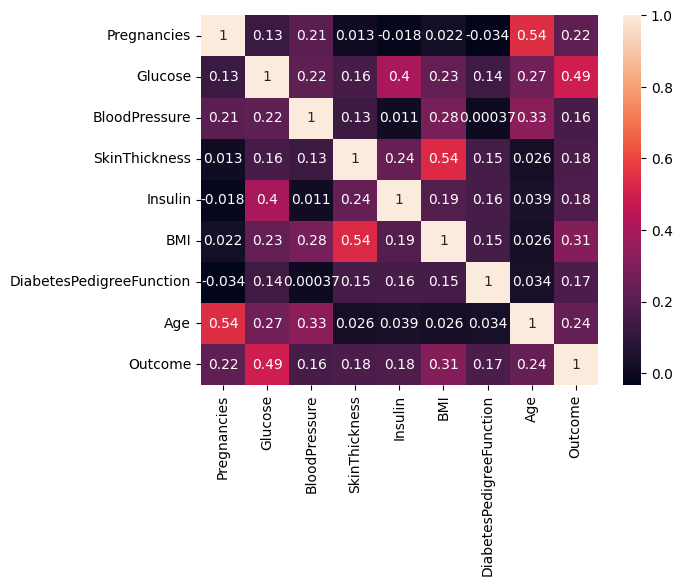

In [8]:
# label 0 represents non diabetic people and 1 represents diabetic
print(diabetes_dataset.groupby('Outcome').mean())
# this is imp because we will get the mean for all the feautures based on whether they are diabetic or not

a=sns.countplot(x='Outcome',data= diabetes_dataset)
print(a)
#printing the heatmap or correlation matrix
b=sns.heatmap(diabetes_dataset.corr(), annot = True)
print(b)
# now the next step is that we have to train our model
# that means we have to do a training and testing data split within which we need to seperate the outcom variable and the feature variable

# now checking the null values
diabetes_dataset.isnull().sum()

X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']
print(X)
print(Y)
# above the axis is for the thing if we want to drop y then 1 if we want to drop a row then axis =0 which means x axis

#now we will standarise the data, because the range of all features is all different which can be confusing for algorithm
# standarise meaning getting in a particular range
# we have two things we can do, we have standarizarion and the other is normalisation.
# both are used in different scenarios, standardisation when the data is normal means its has a gaussian distribution (i,e maximum in the centre and curve around like a bell )
# normalisation when we dont have normal data any it follows any other curve other than the normal curve distribution
# for this we will use the standard scalar function that we imported in the beginning of our code
# we need to create instant of that
scaler =StandardScaler()
# now as we need to fit our data X to standardize the feaures, we will fit in the scalar instance that we created
scaler.fit(X)
# this scaler.fit taken out the mean and the standard deviation requried in standarization process
standardized_data= scaler.transform(X)
# the transform function above now convert all the values in standardized form using the mean and the deviation calculated above
# its done based on a mathematical formula
# if we just print standardized_data it will give out required output in an array form
# to print in a dataframe we can use the command as below
print(pd.DataFrame(standardized_data))


In [9]:
# now we have standardized data so we need to update the value of X which we seperated
X=standardized_data
# we can rewrite above as X=pd.DataFrame(standardized_data) to see it as the dataframs instead of an array
Y=diabetes_dataset['Outcome']
# now we have all the values in required format and range we need to split in test and train data
# now we will mention 4 variables here
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y,random_state=2)
# stratify=Y: This ensures that the proportion of apples and oranges in the training and testing sets is the same as in the original dataset and
#so that all the cases of any 1 particular outcome dont go to a particular train/test dataset created
#This helps the model learn a more accurate representation of the data.
#random_state=2: This sets a random seed. It's like fixing a random number generator,
# so that if you run the code again with the same seed, you'll get the same split of data. This helps in reproducibility.


In [10]:

#training the model
lr.fit(X_train,Y_train)

#training accuracy
lr.score(X_train,Y_train)

#predicted outcomes
lr_pred = lr.predict(X_test)
test_log_data_accuracy = accuracy_score(lr_pred,Y_test)
print('Logistic regression accuracy is :', test_log_data_accuracy*100, '%')


Logistic regression accuracy is : 75.97402597402598 %


(768, 8) (614, 8) (154, 8)
accuracy score of out training data for rechecking is % is : 78.0130293159609 %
Random Forest Accuracy: 72.73%
SVM accuracy is : 77.92207792207793 %


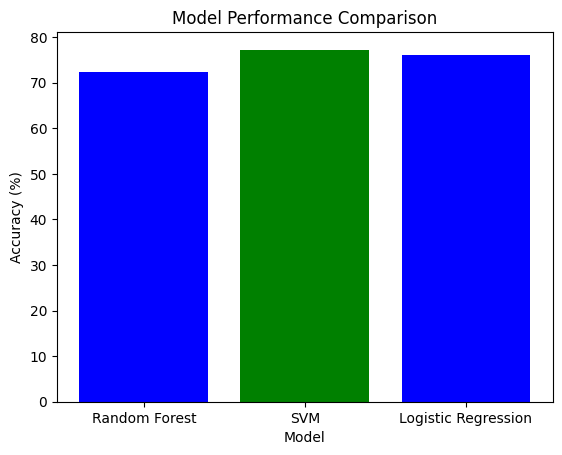

[[ 0.04601433 -0.38405874  1.63075046 -2.76431863 -1.27564498  0.74942117
  -0.84827977 -0.27575966]]
[0]
the person is non diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


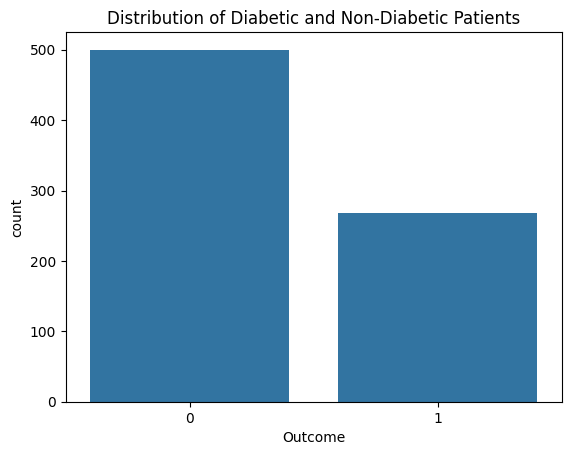

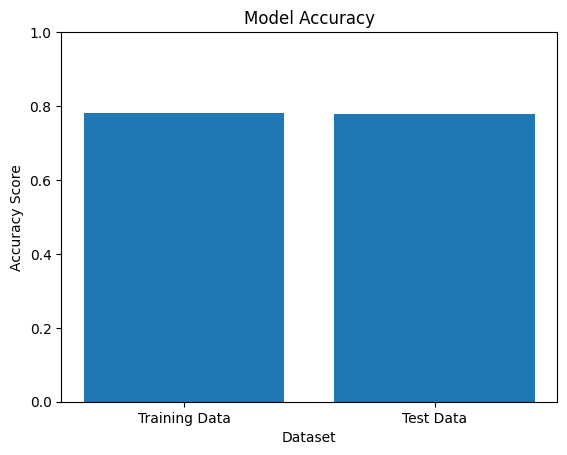

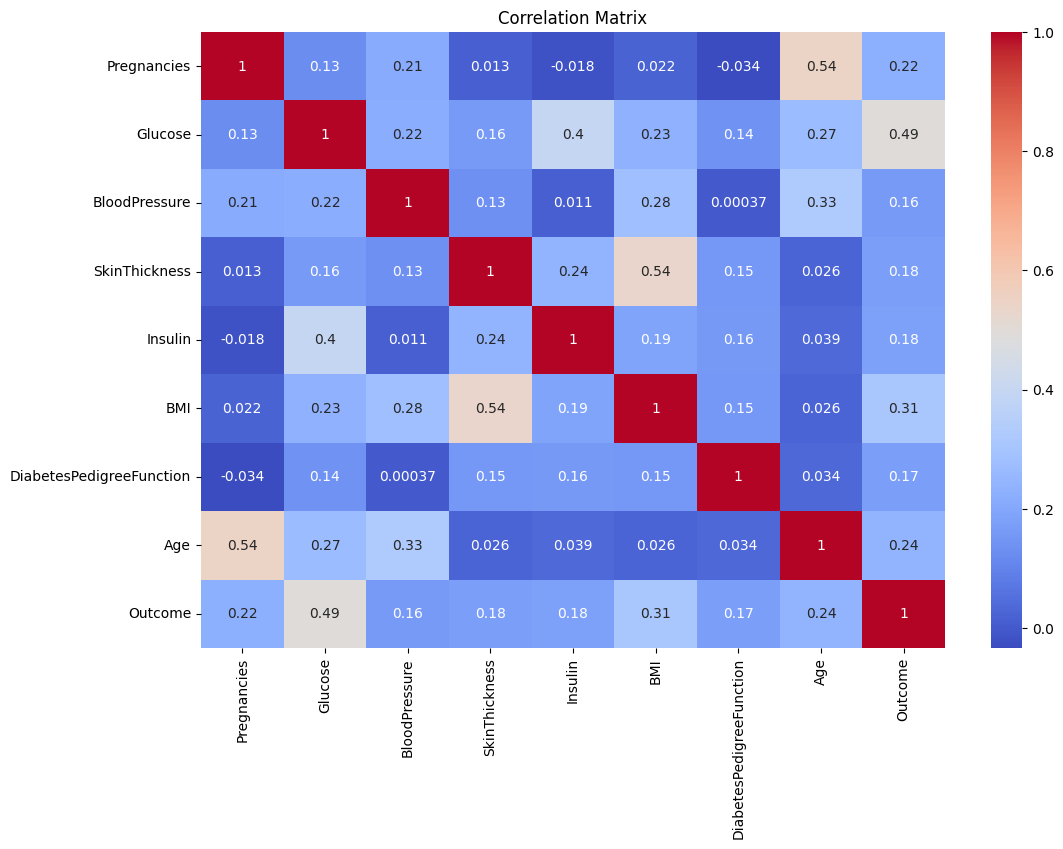

In [11]:

# now we will check the shape of our split data set i.e the train and the test
print(X.shape, X_train.shape, X_test.shape)

#now since we have our data split now we will train out model using the support vector machine classifier
classifier=svm.SVC(kernel='linear')
# now we will fit out training data into this support vector machine classifier
classifier.fit(X_train,Y_train)
# now out training is complete
# now we can Evaluate our model
# now we will find the accuracy score on training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('accuracy score of out training data for rechecking is % is :', training_data_accuracy*100, '%')

# random forest code
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)

# Accuracy of random forrest
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predictions) * 100
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")
# now since we have just rechecked
# now is the main part where we calculate the accuracy score based on our test data

# accuracy score on test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('SVM accuracy is :', test_data_accuracy*100, '%')



# Model accuracies
models = ['Random Forest', 'SVM', 'Logistic Regression']
accuracies = [72.23, 77.22, 75.97]

# Create a bar chart
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance Comparison')
plt.show()


# Making a predictive System
input_data=(4,110,92,0,0,37.6,0.191,30)
# changing the input data to numpyarray
input_data_as_numpy_array=np.asarray(input_data)

# reshaping  the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('the person is non diabetic')
else:
  print('the person is diabetic')

sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Distribution of Diabetic and Non-Diabetic Patients')
plt.show()

plt.bar(['Training Data', 'Test Data'], [training_data_accuracy, test_data_accuracy])
plt.xlabel('Dataset')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy')
plt.ylim([0, 1])
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
#Accuracy Scores
from sklearn.metrics import classification_report
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       100
           1       0.71      0.54      0.61        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [13]:

print(classification_report(Y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



In [14]:
print(classification_report(Y_test, X_test_prediction))


              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.54      0.63        54

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154

